# TS Tiktokenizer Performance

This notebook is used for analyzing the performance of and performance improvements to the Tokenizer. It uses the VS Code repo as its corpus. First, let's grab the last released version of `@microsoft/tiktokenizer`, and get a baseline.

In [20]:
import os
import subprocess
import json

vscode_repo_path = "../../../vscode"
if not os.path.exists(vscode_repo_path):
    print("The repo does not exist.")

def run_benchmark(module_path, encoder_name = 'cl100k_base', method = 'encode'):
    command = f"node --prof ./benchmark-folder.js {encoder_name} {vscode_repo_path}/src {method} {module_path}"
    result = subprocess.check_output(command, shell=True)
    parsed = json.loads(result)
    return parsed

os.system('npm install @microsoft/tiktokenizer --prefix ./')


0

Performance can vary machine to machine, make sure to collect a baseline before you start working. Every time you run a benchmark, there'll be a `profile.cpuprofile` written out that you can inspect.

In [21]:
# This can take a minute, make some tea 🍵
baseline = run_benchmark('@microsoft/tiktokenizer')

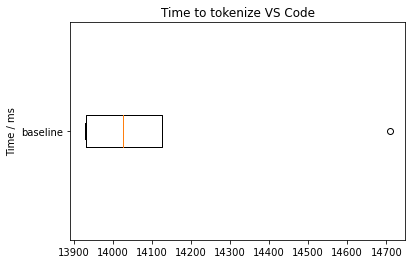

In [22]:
import matplotlib.pyplot as plt
cycles = baseline['cycles']
fig, ax = plt.subplots()
ax.boxplot(cycles, vert=False, labels=["baseline"])
ax.set_title('Time to tokenize VS Code')
ax.set_ylabel('Time / ms')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
plt.show()


Here's the current performance of the repo. Make sure to `npm run build` or `npm run watch` first!

In [23]:
updated = run_benchmark('../')

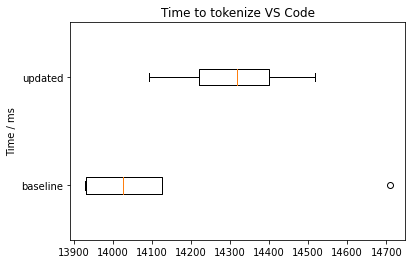

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot([baseline['cycles'], updated['cycles']], vert=False, labels=["baseline", "updated"])
ax.set_title('Time to tokenize VS Code')
ax.set_ylabel('Time / ms')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
plt.show()


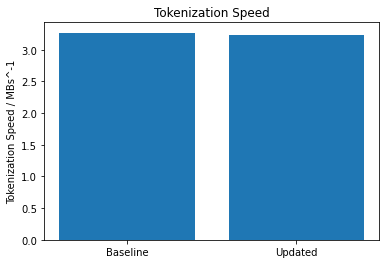

In [31]:
fig, ax = plt.subplots()

# Calculate average time in seconds
baseline_avg_time = sum(baseline['cycles']) / len(baseline['cycles']) / 1000
updated_avg_time = sum(updated['cycles']) / len(updated['cycles']) / 1000

# Calculate total size in MB
total_size_MB = baseline['totalSize'] / (1024 * 1024)

# Calculate average speed in MB/s
baseline_speed = total_size_MB / baseline_avg_time
updated_speed = total_size_MB / updated_avg_time

# Plot the bar chart
ax.bar(['Baseline', 'Updated'], [baseline_speed, updated_speed])
ax.set_ylabel('Tokenization Speed / MBs^-1')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
plt.title('Tokenization Speed')
plt.show()